# Import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
import os

# Load and split MNIST dataset

In [2]:
(train_imgs, train_labels), (test_imgs, test_labels) = keras.datasets.mnist.load_data()

# Details of Train dataset

60000
10000
(28, 28)
Train label: 3


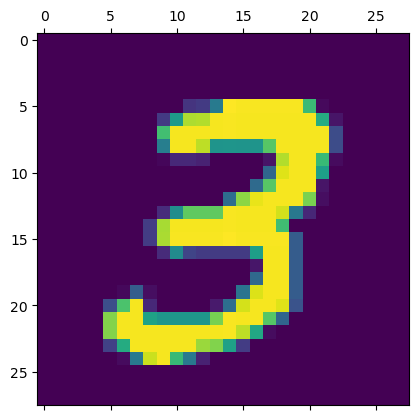

In [3]:
print(len(train_imgs))
print(len(test_imgs))
print(train_imgs[7].shape)
plt.matshow(train_imgs[7])

print(f"Train label: {train_labels[7]}")

In [4]:
train_imgs[7]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43,
        105, 255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,
          0,   0],
       [  

# Preprocess

In [5]:
train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

In [6]:
train_imgs[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Reshape - flatten

In [7]:
train_imgs_flattened = train_imgs.reshape(len(train_imgs), 28*28)
test_imgs_flattened = test_imgs.reshape(len(test_imgs), 28*28)

In [8]:
train_imgs_flattened.shape

(60000, 784)

In [9]:
train_imgs_flattened[7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

# Model training

In [10]:
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_imgs_flattened, train_labels, epochs=5)

# model.save("basics.keras")

# loaded_model = keras.saving.load_model("basics.keras")

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8147 - loss: 0.7134
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9147 - loss: 0.3107
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9216 - loss: 0.2838
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9232 - loss: 0.2693
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9264 - loss: 0.2638


# Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[5.1982477e-02 2.4871577e-02 5.3736042e-02 9.8207116e-01 2.5078349e-03
 8.8198560e-01 1.6670407e-03 7.7744154e-04 6.6562605e-01 7.6324649e-02]


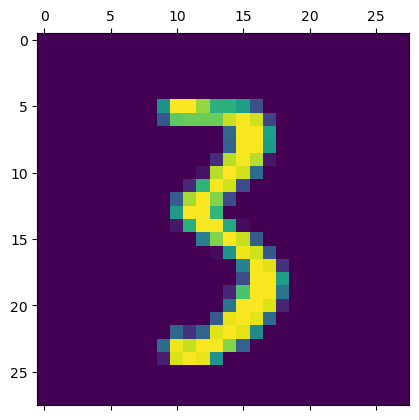


Prediction: 3



In [11]:
y_pred = model.predict(test_imgs_flattened)

piece = 112

print(y_pred[piece])

plt.matshow(test_imgs[piece])
plt.show()

print(f"\nPrediction: {np.argmax(y_pred[piece])}\n")

# Prediction with own images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


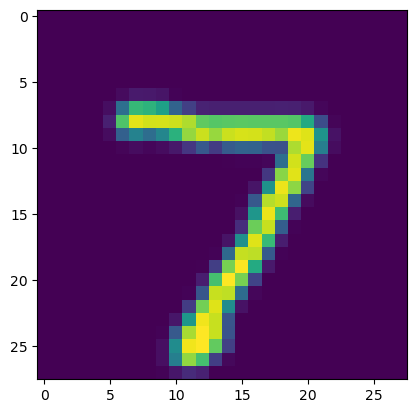


Prediction: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


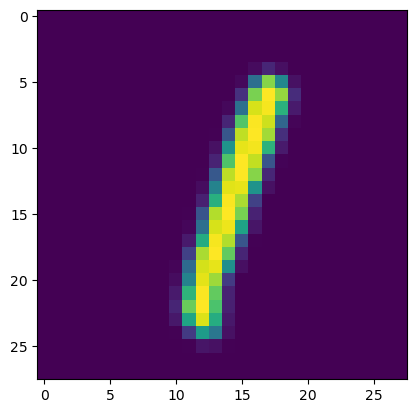


Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


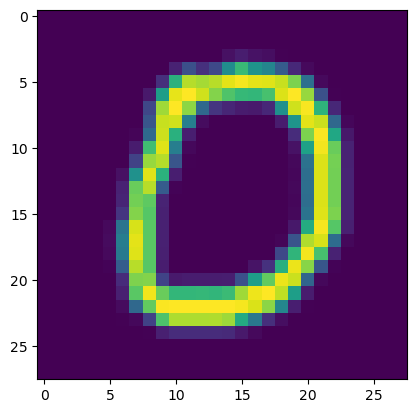


Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


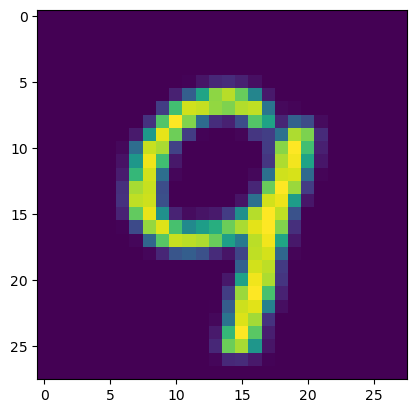


Prediction: 9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


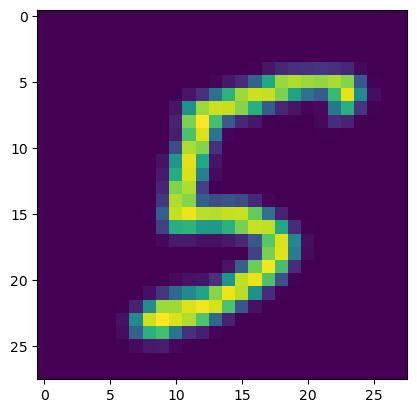


Prediction: 5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


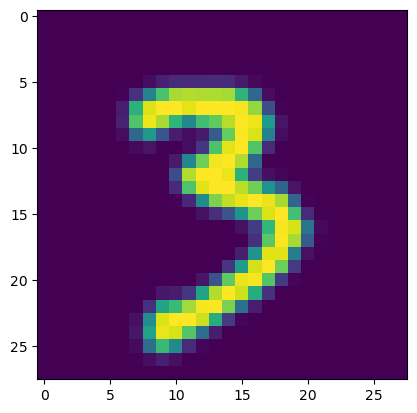


Prediction: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


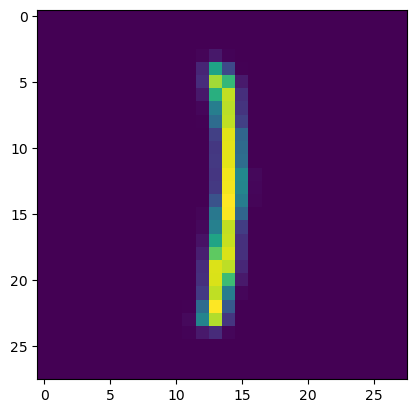


Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


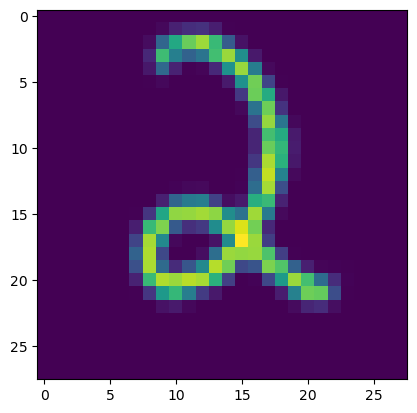


Prediction: 2


In [12]:
images = os.listdir('test_images')

for image in images:
    image_path = os.path.join('test_images', image)
    image = Image.open(image_path)

    resized_image = image.resize((28,28)).convert('L')

    image_array = np.array(resized_image).reshape(1, 28*28)/255

    predicted_labels = model.predict(image_array)
    predicted_label = np.argmax(predicted_labels)

    plt.imshow(image_array.reshape(28, 28))
    plt.show()

    print(f"\nPrediction: {predicted_label}")